### Q4. [3 points] Build one or more models predicting candidate support, rather than partisanship.

In [282]:
# importing libraries


from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns

In [283]:
FX_indicators_2020_df = pd.read_csv('FX_indicators_2020.csv')

In [284]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,MOVED_RDMA,MOVED_DRMA,MOVED_AWMA,MOVED_ADMA,MOVED_ARMA,MOVED_RDMB,MOVED_DRMB,MOVED_AWMB,MOVED_ADMB,MOVED_ARMB
0,84508,3,0,25,4,0,0,38,39,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,608312,1,0,35,0,0,3,46,46,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,222821,3,0,73,3,0,0,42,36,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,137882,2,0,54,1,1,0,37,34,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,531303,2,0,51,0,3,0,46,46,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384982,430307,2,0,64,3,0,0,32,32,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384983,189580,1,55,23,5,0,1,38,39,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384984,137630,2,0,29,0,1,1,36,37,35,...,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N
384985,140246,2,0,68,1,0,0,33,32,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
FX_indicators_2020_df.describe()

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,HEALTHFITN,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,PRS16_PD,PRS16_PR,MSG_A,MSG_B
count,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,...,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000
mean,318457.590755,2.002221,0.570999,50.864408,1.205781,0.730287,0.618231,39.256326,37.093512,41.493762,...,0.982771,0.044602,0.145909,0.530914,0.534854,12.610530,46.943522,51.377199,0.077829,0.077764
std,183665.590377,0.816945,5.323766,18.141040,1.306398,1.063950,0.950737,6.934079,7.190315,7.296544,...,0.678549,0.330575,0.480255,0.521946,0.537452,1.089046,5.754449,5.814682,0.267902,0.267800
min,2.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,34.100000,17.000000,0.000000,0.000000
25%,159325.500000,1.000000,0.000000,36.000000,0.000000,0.000000,0.000000,34.000000,32.000000,35.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,42.800000,47.800000,0.000000,0.000000
50%,318561.000000,2.000000,0.000000,51.000000,1.000000,0.000000,0.000000,38.000000,36.000000,41.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,12.000000,45.800000,52.500000,0.000000,0.000000
75%,477540.000000,3.000000,0.000000,65.000000,2.000000,1.000000,1.000000,44.000000,40.000000,48.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,13.000000,50.400000,55.600000,0.000000,0.000000
max,636572.000000,3.000000,100.000000,113.000000,9.000000,9.000000,9.000000,65.000000,65.000000,65.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,16.000000,80.600000,64.300000,1.000000,1.000000


In [286]:
FX_indicators_2020_df.dtypes

VOTER_ID       int64
SET_NO         int64
OPP_SEX        int64
AGE            int64
HH_ND          int64
               ...  
MOVED_RDMB    object
MOVED_DRMB    object
MOVED_AWMB    object
MOVED_ADMB    object
MOVED_ARMB    object
Length: 152, dtype: object

In [287]:
FX_indicators_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384987 entries, 0 to 384986
Columns: 152 entries, VOTER_ID to MOVED_ARMB
dtypes: float64(2), int64(105), object(45)
memory usage: 446.5+ MB


In [288]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(384987, 152)
VOTER_ID           0
SET_NO             0
OPP_SEX            0
AGE                0
HH_ND              0
               ...  
MOVED_RDMB    371383
MOVED_DRMB    371383
MOVED_AWMB    371383
MOVED_ADMB    371383
MOVED_ARMB    371383
Length: 152, dtype: int64


In [289]:
FX_indicators_2020_df.isnull().any()

VOTER_ID      False
SET_NO        False
OPP_SEX       False
AGE           False
HH_ND         False
              ...  
MOVED_RDMB     True
MOVED_DRMB     True
MOVED_AWMB     True
MOVED_ADMB     True
MOVED_ARMB     True
Length: 152, dtype: bool

In [290]:
FX_indicators_2020_df.drop(columns = ['CAND1S','CAND2S','MESSAGE'], axis=1, inplace=True)

In [291]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'COMM_LT10':'ED_4COL'].columns, axis = 1)

In [292]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'H_AFDLN3P':'MSG_B'].columns, axis = 1)

In [293]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'CAND1_UND':'CAND1_SD2'].columns, axis = 1)

In [294]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'CAND1_LD2':'CAND1_SR2'].columns, axis = 1)

In [295]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'CAND1_LRA':'CAND2_SD2'].columns, axis = 1)

In [296]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'CAND2_LD2':'CAND2_SR2'].columns, axis = 1)

In [297]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'CAND2_LRA':'MOVED_ARMB'].columns, axis = 1)

In [298]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(384987, 30)
VOTER_ID          0
SET_NO            0
OPP_SEX           0
AGE               0
HH_ND             0
HH_NR             0
HH_NI             0
MED_AGE           0
MED_AGE_M         0
MED_AGE_F         0
NH_WHITE          0
NH_AA             0
NH_NATAM          0
NH_ASIAN          0
NH_HPI            0
NH_OTHER          0
NH_MULT           0
HISP              0
GENDER_F          0
GENDER_M          0
VG_14_DV      98701
D2            92878
R2            92878
D3                0
R3                0
I3            48094
CAND1_SDA    295109
CAND1_SRA    295109
CAND2_SDA    343821
CAND2_SRA    343821
dtype: int64


In [299]:
FX_indicators_2020_df.dropna(inplace=True)

In [300]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,VG_14_DV,D2,R2,D3,R3,I3,CAND1_SDA,CAND1_SRA,CAND2_SDA,CAND2_SRA
23,532172,1,0,26,2,0,2,37,35,38,...,N,Y,N,Y,N,Y,N,N,Y,N
25,208471,1,0,57,1,2,1,37,37,38,...,Y,N,Y,N,Y,N,N,Y,N,Y
37,261184,3,0,50,0,0,2,38,38,39,...,Y,Y,N,Y,N,Y,N,N,N,Y
39,171122,2,0,39,2,0,0,32,32,33,...,Y,N,Y,N,Y,N,N,Y,N,Y
46,372836,1,0,64,1,0,0,38,40,38,...,Y,Y,N,Y,N,N,Y,N,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384906,154269,2,0,47,1,0,0,50,50,50,...,Y,N,Y,N,Y,N,Y,N,Y,N
384929,288257,3,0,68,0,0,1,38,40,38,...,N,Y,N,Y,N,Y,N,N,Y,N
384936,303216,1,0,61,1,2,1,39,26,50,...,N,N,Y,N,Y,Y,N,N,Y,N
384972,15258,3,0,25,1,0,3,35,31,45,...,N,Y,N,Y,N,Y,Y,N,Y,N


In [301]:
FX_indicators_2020_df['I3']

23        Y
25        N
37        Y
39        N
46        N
         ..
384906    N
384929    Y
384936    Y
384972    Y
384973    N
Name: I3, Length: 19903, dtype: object

In [302]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(19903, 30)
VOTER_ID     0
SET_NO       0
OPP_SEX      0
AGE          0
HH_ND        0
HH_NR        0
HH_NI        0
MED_AGE      0
MED_AGE_M    0
MED_AGE_F    0
NH_WHITE     0
NH_AA        0
NH_NATAM     0
NH_ASIAN     0
NH_HPI       0
NH_OTHER     0
NH_MULT      0
HISP         0
GENDER_F     0
GENDER_M     0
VG_14_DV     0
D2           0
R2           0
D3           0
R3           0
I3           0
CAND1_SDA    0
CAND1_SRA    0
CAND2_SDA    0
CAND2_SRA    0
dtype: int64


In [319]:
X = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'VG_14_DV':'I3'].columns, axis = 1)

In [320]:
X

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,NH_HPI,NH_OTHER,NH_MULT,HISP,GENDER_F,GENDER_M,CAND1_SDA,CAND1_SRA,CAND2_SDA,CAND2_SRA
23,532172,1,0,26,2,0,2,37,35,38,...,0,0,3,6,1,0,N,N,Y,N
25,208471,1,0,57,1,2,1,37,37,38,...,0,0,7,2,1,0,N,Y,N,Y
37,261184,3,0,50,0,0,2,38,38,39,...,0,0,1,3,0,1,N,N,N,Y
39,171122,2,0,39,2,0,0,32,32,33,...,0,0,2,5,0,1,N,Y,N,Y
46,372836,1,0,64,1,0,0,38,40,38,...,0,0,8,0,0,1,Y,N,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384906,154269,2,0,47,1,0,0,50,50,50,...,0,0,1,1,1,0,Y,N,Y,N
384929,288257,3,0,68,0,0,1,38,40,38,...,0,0,8,0,1,0,N,N,Y,N
384936,303216,1,0,61,1,2,1,39,26,50,...,0,0,1,6,0,1,N,N,Y,N
384972,15258,3,0,25,1,0,3,35,31,45,...,0,12,0,3,1,0,Y,N,Y,N


In [321]:
X = X.drop(['CAND1_SDA', 'CAND1_SRA', 'CAND2_SDA', 'CAND2_SRA'], axis=1)

In [323]:
X

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,NH_WHITE,NH_AA,NH_NATAM,NH_ASIAN,NH_HPI,NH_OTHER,NH_MULT,HISP,GENDER_F,GENDER_M
23,532172,1,0,26,2,0,2,37,35,38,87,5,0,0,0,0,3,6,1,0
25,208471,1,0,57,1,2,1,37,37,38,54,37,0,1,0,0,7,2,1,0
37,261184,3,0,50,0,0,2,38,38,39,83,12,0,1,0,0,1,3,0,1
39,171122,2,0,39,2,0,0,32,32,33,67,12,0,14,0,0,2,5,0,1
46,372836,1,0,64,1,0,0,38,40,38,85,4,0,4,0,0,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384906,154269,2,0,47,1,0,0,50,50,50,89,3,0,6,0,0,1,1,1,0
384929,288257,3,0,68,0,0,1,38,40,38,85,4,0,4,0,0,8,0,1,0
384936,303216,1,0,61,1,2,1,39,26,50,37,55,0,2,0,0,1,6,0,1
384972,15258,3,0,25,1,0,3,35,31,45,53,29,0,4,0,12,0,3,1,0


In [324]:
X = pd.get_dummies(X)

In [325]:
y = FX_indicators_2020_df[['CAND1_SDA', 'CAND1_SRA', 'CAND2_SDA', 'CAND2_SRA']]

In [326]:
y

,CAND1_SDA,CAND1_SRA,CAND2_SDA,CAND2_SRA
23,N,N,Y,N
25,N,Y,N,Y
37,N,N,N,Y
39,N,Y,N,Y
46,Y,N,Y,N
...,...,...,...,...
384906,Y,N,Y,N
384929,N,N,Y,N
384936,N,N,Y,N
384972,Y,N,Y,N


In [327]:
y = pd.get_dummies(y)

In [328]:
y

,CAND1_SDA_N,CAND1_SDA_Y,CAND1_SRA_N,CAND1_SRA_Y,CAND2_SDA_N,CAND2_SDA_Y,CAND2_SRA_N,CAND2_SRA_Y
23,1,0,1,0,0,1,1,0
25,1,0,0,1,1,0,0,1
37,1,0,1,0,1,0,0,1
39,1,0,0,1,1,0,0,1
46,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...
384906,0,1,1,0,0,1,1,0
384929,1,0,1,0,0,1,1,0
384936,1,0,1,0,0,1,1,0
384972,0,1,1,0,0,1,1,0


In [332]:
y1 = y['CAND1_SDA_Y']

y2 = y['CAND1_SRA_Y']

y3 = y['CAND2_SDA_Y']

y4 = y['CAND2_SRA_Y']

In [334]:
y3

23        1
25        0
37        0
39        0
46        1
         ..
384906    1
384929    1
384936    1
384972    1
384973    1
Name: CAND2_SDA_Y, Length: 19903, dtype: uint8

### Build log regression models predicting candidate support (y1 = CAND1_SDA_Y, wave 1 strong all way democrat)

In [400]:
 from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train_1, y_test_1 = train_test_split(X, y1, test_size=0.3, random_state=1) # 70% training and 30% test

In [401]:
logreg_1 = LogisticRegression()

In [402]:
logreg_1 = logreg_1.fit(X_train,y_train_1)

In [403]:
#Predict the response for test dataset
y_pred_1 = logreg_1.predict(X_test)

In [404]:
y_pred_1

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [392]:

print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1))

Accuracy: 0.8020432088427399


In [405]:
# Predict for 1 observation
logreg_1.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
logreg_1.predict(X_test[0:100])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [406]:
# The score method returns the accuracy of the model
score = logreg_1.score(X_test, y_test_1)
print(score)

0.8020432088427399


In [407]:
from sklearn.metrics import confusion_matrix #confusion_matrix 
confusion_matrix(y_test_1, y_pred_1)

array([[4789,    0],
       [1182,    0]], dtype=int64)

In [408]:
from sklearn.metrics import classification_report # classification_report 

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4789
           1       0.00      0.00      0.00      1182

    accuracy                           0.80      5971
   macro avg       0.40      0.50      0.45      5971
weighted avg       0.64      0.80      0.71      5971



C:\Users\Nirav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


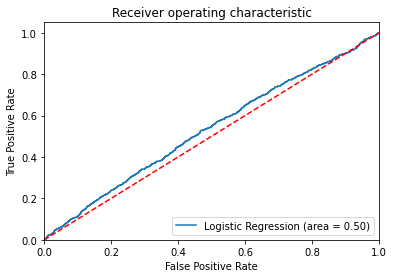

In [409]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_test_1, logreg_1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test_1, logreg_1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

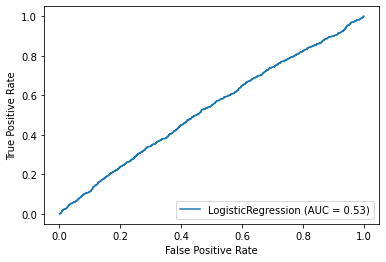

In [410]:
from sklearn.metrics import plot_roc_curve # roc_curve
plot_roc_curve(logreg_1, X_test, y_test_1)

In [427]:
prob_1 = logreg_1.predict_proba(X_test[0:100])

In [428]:
prob_1

array([[0.80449325, 0.19550675],
       [0.82539418, 0.17460582],
       [0.79992473, 0.20007527],
       [0.77095977, 0.22904023],
       [0.82401169, 0.17598831],
       [0.77764292, 0.22235708],
       [0.82557483, 0.17442517],
       [0.78989177, 0.21010823],
       [0.85364151, 0.14635849],
       [0.8333949 , 0.1666051 ],
       [0.78323725, 0.21676275],
       [0.76494031, 0.23505969],
       [0.84184627, 0.15815373],
       [0.76847277, 0.23152723],
       [0.82806867, 0.17193133],
       [0.84937982, 0.15062018],
       [0.77784428, 0.22215572],
       [0.85137779, 0.14862221],
       [0.78182958, 0.21817042],
       [0.76544984, 0.23455016],
       [0.78675846, 0.21324154],
       [0.76415598, 0.23584402],
       [0.80766516, 0.19233484],
       [0.8124714 , 0.1875286 ],
       [0.88460615, 0.11539385],
       [0.83741344, 0.16258656],
       [0.79500768, 0.20499232],
       [0.85684607, 0.14315393],
       [0.78898322, 0.21101678],
       [0.81467167, 0.18532833],
       [0.

In [429]:
# first 100 voters prediction for candidate support (y1 = CAND1_SDA_Y, wave 1 strong all way democrat)

y_100_1 = logreg_1.predict(X_test[0:100])

In [430]:
y_100_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Build log regression models predicting candidate support (y4 = CAND2_SRA_Y, wave 2 strong all way republican)

In [431]:
 from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train_4, y_test_4 = train_test_split(X, y4, test_size=0.3, random_state=1) # 70% training and 30% test

In [432]:
logreg_4 = LogisticRegression()

In [433]:
logreg_4 = logreg_4.fit(X_train,y_train_4)

In [434]:
#Predict the response for test dataset
y_pred_4 = logreg.predict(X_test)

In [435]:
y_pred_4

array([1, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [436]:
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1))

Accuracy: 0.8020432088427399


In [437]:
from sklearn.metrics import confusion_matrix #confusion_matrix 
confusion_matrix(y_test_4, y_pred_4)

array([[2941,  636],
       [1558,  836]], dtype=int64)

In [438]:
from sklearn.metrics import classification_report # classification_report 

print(classification_report(y_test_4, y_pred_4))

              precision    recall  f1-score   support

           0       0.65      0.82      0.73      3577
           1       0.57      0.35      0.43      2394

    accuracy                           0.63      5971
   macro avg       0.61      0.59      0.58      5971
weighted avg       0.62      0.63      0.61      5971



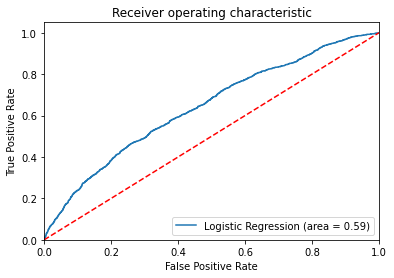

In [439]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_test_4, logreg_4.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test_4, logreg_4.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

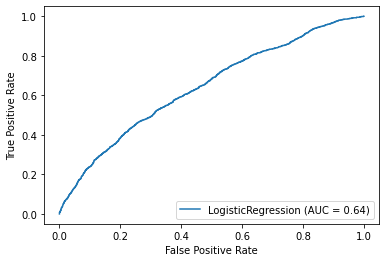

In [440]:
from sklearn.metrics import plot_roc_curve # roc_curve
plot_roc_curve(logreg_4, X_test, y_test_4)

In [441]:
prob_4 = logreg_4.predict_proba(X_test[0:100])

In [442]:
prob_4

array([[0.49591463, 0.50408537],
       [0.63140376, 0.36859624],
       [0.30535845, 0.69464155],
       [0.7050681 , 0.2949319 ],
       [0.6758633 , 0.3241367 ],
       [0.49567058, 0.50432942],
       [0.66346431, 0.33653569],
       [0.68602178, 0.31397822],
       [0.7065866 , 0.2934134 ],
       [0.63126119, 0.36873881],
       [0.54455243, 0.45544757],
       [0.78375004, 0.21624996],
       [0.49378016, 0.50621984],
       [0.67977945, 0.32022055],
       [0.50181818, 0.49818182],
       [0.77547103, 0.22452897],
       [0.41058539, 0.58941461],
       [0.76090623, 0.23909377],
       [0.60897694, 0.39102306],
       [0.77763373, 0.22236627],
       [0.5857595 , 0.4142405 ],
       [0.62306682, 0.37693318],
       [0.57844067, 0.42155933],
       [0.73499378, 0.26500622],
       [0.71729185, 0.28270815],
       [0.75866923, 0.24133077],
       [0.69262192, 0.30737808],
       [0.48182684, 0.51817316],
       [0.34408946, 0.65591054],
       [0.64444894, 0.35555106],
       [0.

In [443]:
# first 100 voters for predicting candidate support (y4 = CAND2_SRA_Y, wave 2 strong all way republican)

y_100_4 = logreg_4.predict(X_test[0:100])

In [444]:
y_100_4

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [445]:
VOTER_ID_100= X_test.iloc[0:100, 0].reset_index(drop=True)

In [446]:
VOTER_ID_100

0     112407
1     430544
2     233730
3     600472
4     372836
       ...  
95    327529
96    183338
97     95922
98     10495
99    344248
Name: VOTER_ID, Length: 100, dtype: int64

In [449]:
y_100_S_1= pd.Series(y_100_1).reset_index(drop=True)

In [452]:
y_100_S_1

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: uint8

In [453]:
y_100_S_4= pd.Series(y_100_4).reset_index(drop=True)

In [454]:
y_100_S_4

0     1
1     0
2     1
3     0
4     0
     ..
95    0
96    1
97    0
98    0
99    0
Length: 100, dtype: uint8

In [456]:
q4_df_voter_ID_modelscore_log_reg = pd.concat([VOTER_ID_100, y_100_S_1, y_100_S_4 ], axis=1, 
                                              keys=["VOTER_ID_100", "wave 1 stong democrat", "wave 2 stong republican"])

In [457]:
q4_df_voter_ID_modelscore_log_reg

,VOTER_ID_100,wave 1 stong democrat,wave 2 stong republican
0,112407,0,1
1,430544,0,0
2,233730,0,1
3,600472,0,0
4,372836,0,0
...,...,...,...
95,327529,0,0
96,183338,0,1
97,95922,0,0
98,10495,0,0


In [458]:
q4_df_voter_ID_modelscore_log_reg.to_csv (r'C:\Users\Nirav\Desktop\pyjup\q4_df_voter_ID_modelscore_log_reg.csv', 
                                            index = False, header=True)